<a href="https://colab.research.google.com/github/sudoyolo/israelwar/blob/main/data_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff


# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# important libraries
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from collections import Counter
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import os

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('en_data_final.csv')

In [ ]:
df.shape

(4000, 13)

In [ ]:
df.columns

Index(['Unnamed: 0', 'fullname', 'id', 'likes', 'quotes', 'replies',
       'retweets', 'searchQuery', 'text', 'timestamp', 'username', 'verified',
       'tweets_en'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4000 non-null   int64 
 1   fullname     4000 non-null   object
 2   id           4000 non-null   int64 
 3   likes        4000 non-null   int64 
 4   quotes       4000 non-null   int64 
 5   replies      4000 non-null   int64 
 6   retweets     4000 non-null   int64 
 7   searchQuery  4000 non-null   object
 8   text         3994 non-null   object
 9   timestamp    4000 non-null   object
 10  username     4000 non-null   object
 11  verified     4000 non-null   bool  
 12  tweets_en    3995 non-null   object
dtypes: bool(1), int64(6), object(6)
memory usage: 379.0+ KB


In [ ]:
df.isna().sum().sort_values(ascending=False)

text           6
tweets_en      5
Unnamed: 0     0
fullname       0
id             0
likes          0
quotes         0
replies        0
retweets       0
searchQuery    0
timestamp      0
username       0
verified       0
dtype: int64

In [ ]:
#Sort tweets
sorted_tweets = df[['username', 'tweets_en','retweets','id', 'searchQuery', ]].sort_values(by = 'retweets', ascending=False)

In [ ]:
#Most retweeted
most_retweeted = sorted_tweets.iloc[0]
print(most_retweeted.tweets_en)

Message from Gaza . Please please stop


In [ ]:
#Top 10 most retweeted
sorted_tweets.head(10)

,username,tweets_en,retweets,id,searchQuery
136,@Byoussef,Message from Gaza . Please please stop,137218,1717973607635366114,Gaza
3180,@jacksonhinklle,🚨🇮🇱 ISRAEL is a TERRORIST STATE!,121278,1719383589572297100,Israel
1147,@jacksonhinklle,💔🇵🇸 He tried to rush his daughter to the hospi...,87992,1720070314787258489,Palestine
917,@hobismeg,free palestine . free congo. free sudan. this ...,80156,1719067917176754215,Palestine
789,@jacksonhinklle,🚨🇮🇱 Orthodox Jews in Jerusalem VIOLENTLY ASSAU...,79555,1719749832418505217,Palestine
2647,@missfalasteenia,People flying can see Gaza getting bombed from...,69141,1719411630373527690,Gaza
2771,@omarsuleiman504,This should be front page news in mainstream m...,65264,1719334660017094871,Palestine
3321,@levantinewitch,multiple analysts have said that this campaign...,61376,1716866016280784921,Gaza
1300,@CjvHenderson,Just a reminder that the Islamic University of...,57867,1717200740559560929,Gaza
8,@jacksonhinklle,🚨🇮🇱 Israel has now dropped the equivalent of T...,55339,1720095952340721751,Gaza


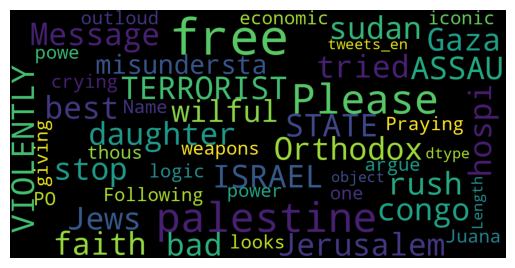

In [ ]:
#WordCloud with STOPWORDS which is imported from wordcloud library
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 3,
                      random_state=42
                     ).generate(str(sorted_tweets['tweets_en']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
unique_tweets = df.drop_duplicates(subset = ['tweets_en'])

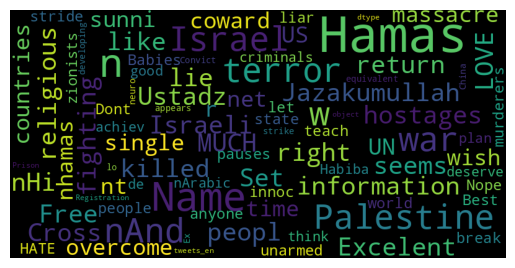

In [ ]:
#Wordclouds using nltk stopwords based on unique tweets and ordered by number of retweets
stopwords_set = set(stopwords.words('english'))
wordcloud= WordCloud(background_color = 'black',
                    stopwords=stopwords_set,
                    max_words=300,
                    max_font_size=40,
                    scale = 2,
                    random_state=42
                    ).generate(str(unique_tweets.sort_values(by = 'retweets').iloc[:20]['tweets_en']))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()